In [2]:
# Install necessary libraries for the project
!pip install pandas scikit-learn nltk matplotlib seaborn wordcloud joblib



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [4]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text


In [6]:
df = pd.read_csv('../data/emotions.csv')  
df.dropna(inplace=True)
df['text'] = df['text'].apply(clean_text)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()


,text,label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


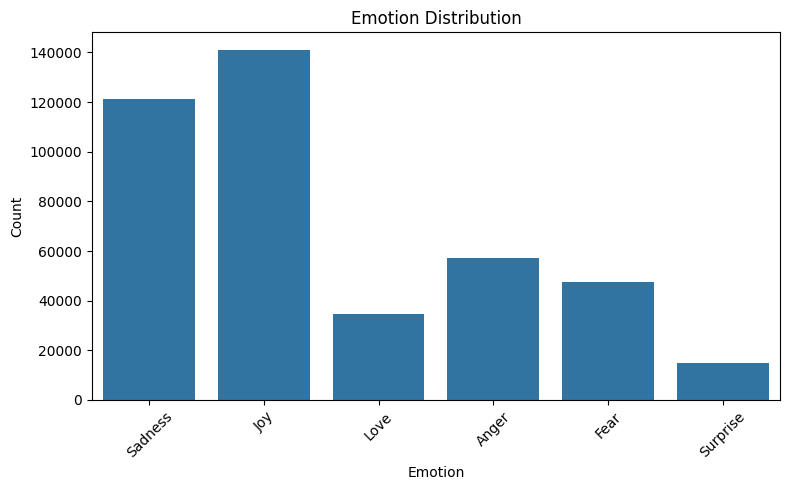

In [7]:
emotion_dict = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}

plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df, order=[0, 1, 2, 3, 4, 5])
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(ticks=range(6), labels=[emotion_dict[i] for i in range(6)], rotation=45)
plt.tight_layout()
plt.show()

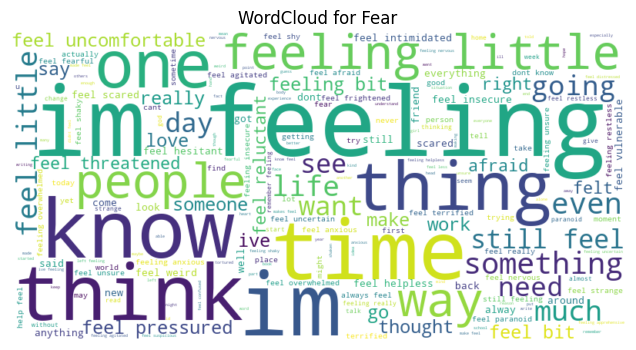

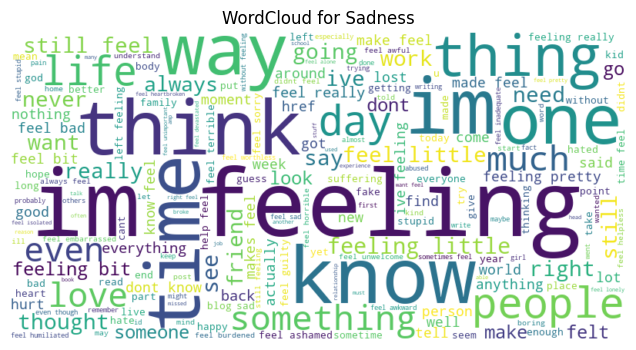

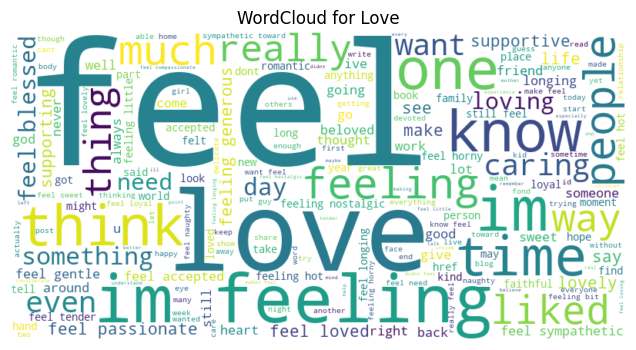

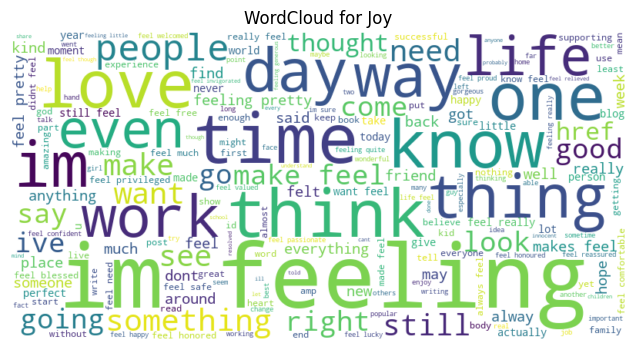

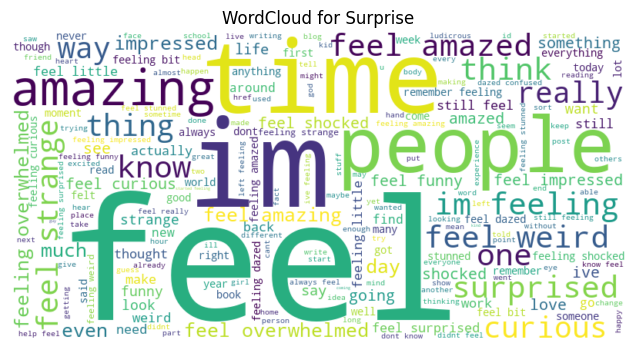

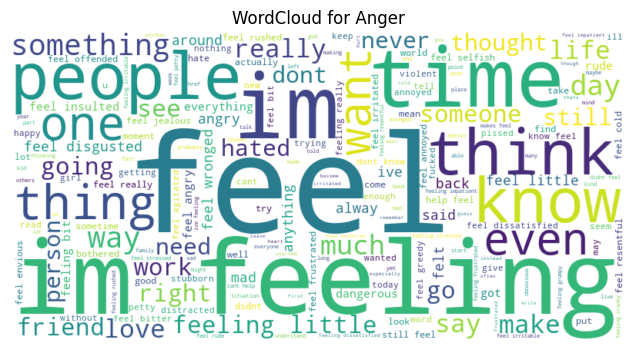

In [8]:
emotion_dict = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}

for emotion in df['label'].unique():
    emotion_name = emotion_dict[emotion]
    text = " ".join(df[df['label'] == emotion]['text'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {emotion_name}")  
    plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)


In [10]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression(max_iter=1000))])

In [11]:
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9010940236558623
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     24201
           1       0.92      0.93      0.92     28164
           2       0.81      0.76      0.79      6929
           3       0.91      0.91      0.91     11441
           4       0.86      0.85      0.85      9594
           5       0.78      0.71      0.74      3033

    accuracy                           0.90     83362
   macro avg       0.87      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362



In [12]:
joblib.dump(pipeline, '../outputs/emotion_model.pkl')


['../outputs/emotion_model.pkl']

In [13]:

sample = ["I can't stop crying. I feel so empty."]


pred = pipeline.predict(sample)


emotion_dict = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}


print("Predicted Emotion:", emotion_dict[pred[0]])


Predicted Emotion: Sadness
